In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import IVY

Populating the interactive namespace from numpy and matplotlib


In [2]:
employee = pd.read_csv(IVY.file_loc('employee'), 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])

In [3]:
IVY.file_loc('employee')

PosixPath('/Users/gaoyan/project/IVY/data/pandas-cookbook-by-Theodore-Petrou/employee.csv')

In [4]:
days_hired = pd.to_datetime('12-1-2016') - employee['HIRE_DATE']

In [5]:
one_year = pd.Timedelta(1, unit='Y')

In [6]:
employee['YEARS_EXPERIENCE'] = days_hired / one_year

In [7]:
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472494
1,2000-07-19,16.369946
2,2015-02-03,1.826184
3,1982-02-08,34.812488
4,1989-06-19,27.452994


In [8]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,10.472494
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,16.369946
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,1.826184
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,34.812488
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,27.452994


# regplot is axes function ( not grid function) on continuous number, lmplot is grid function

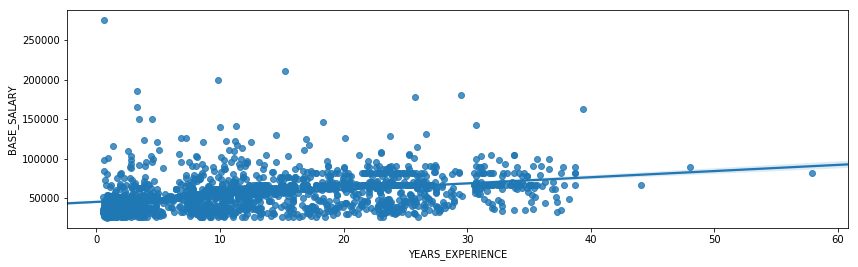

In [9]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                     data=employee)
ax.figure.set_size_inches(14,4)

In [ ]:
g = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',hue='GENDER',row='DEPARTMENT',col='RACE',
                     data=employee)

In [10]:
titanic = IVY.load_dataset("titanic")

In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


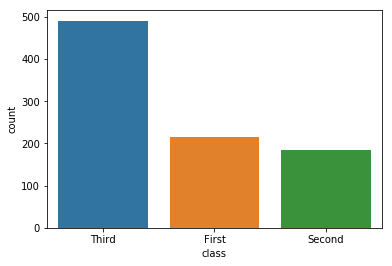

In [11]:
ax = sns.countplot(x="class", data=titanic);

In [12]:
employee.groupby('DEPARTMENT').filter(lambda x: len(x) > 100).head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,1.826184
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,34.812488
5,5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black or African American,Full Time,Male,Active,1984-11-26,2005-03-26,32.014347
6,6,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian/Pacific Islander,Full Time,Male,Active,2012-03-26,2012-03-26,4.684559
7,7,CARPENTER,Houston Airport System (HAS),42390.0,White,Full Time,Male,Active,2013-11-04,2013-11-04,3.074670


In [17]:
df = pd.DataFrame({'A': 'a a b'.split(), 'B': [1,2,3], 'C': [4,6, 5]})
g = df.groupby('A')

# since the function does not change the grain, so the output will be same grain ( it will iterate with each of column)

In [ ]:
g.apply(lambda x: x / x.sum())

# the function return the group level, so the output will be at group level, x means each of subgroup 

In [60]:
g.apply(lambda x: x.max() - x.min())


,B,C
A,,
a,1,2
b,0,0


In [59]:
g[['B','C']].filter(lambda df: len(df)>1)

,B,C
0,1,4
1,2,6


In [63]:
g[['B','C']].filter(lambda df: df['B'].max()>3)

,B,C


In [19]:
import pathlib2 as Path
p = Path.Path.home() / 'classroom'



In [20]:
ret = p.rglob('diamonds.csv')
for i in ret:
    print i

In [22]:
diamonds = pd.read_csv(IVY.file_loc('diamonds'))

In [24]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
                    'VS1', 'VVS2', 'VVS1', 'IF']

In [25]:
diamonds['cut'] = pd.Categorical(diamonds['cut'],
                                     categories=cut_cats, 
                                     ordered=True)
diamonds['color'] = pd.Categorical(diamonds['color'],
                                       categories=color_cats, 
                                       ordered=True)
diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
                                         categories=clarity_cats, 
                                         ordered=True)

In [26]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5,0.98,u'Price Decreasing with Increasing Quality?')

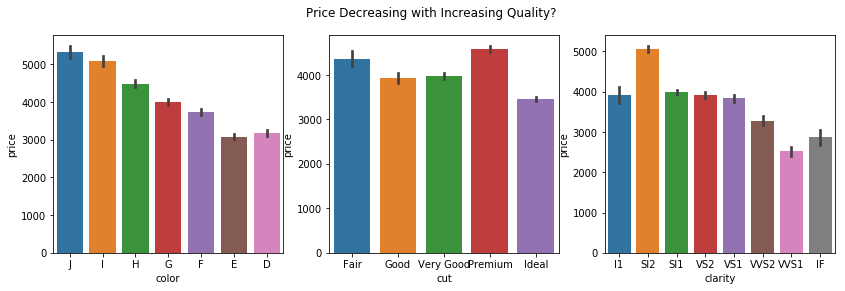

In [27]:
>>> fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
>>> sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
>>> sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
>>> sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
>>> fig.suptitle('Price Decreasing with Increasing Quality?') 

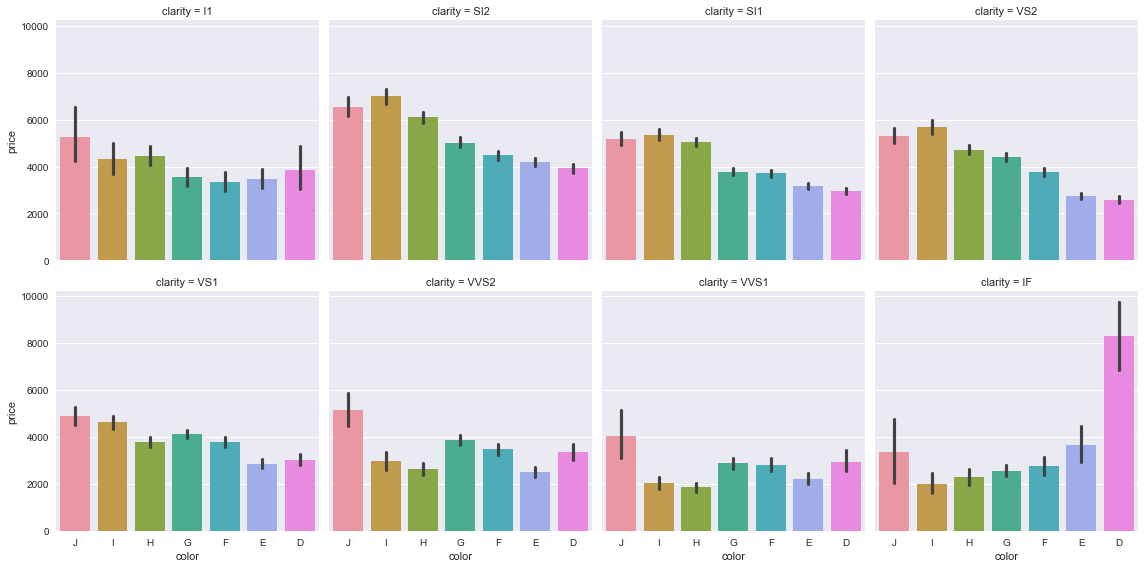

In [69]:
sns.factorplot(x='color', y='price', col='clarity',
                   col_wrap=4, data=diamonds, kind='bar');

In [50]:
p1 = Path.Path.home()/'classroom'

In [51]:
ret = p1.rglob('movie*.*')
ret.next()


WindowsPath('C:/Users/gaoyangao/classroom/data/pandas-cookbook-by-Theodore-Petrou/movie.csv')

In [52]:
>>> movie = pd.read_csv(IVY.get('movie'))
>>> movie2 = movie[['movie_title', 'imdb_score', 'budget']]
>>> movie2.head()

,movie_title,imdb_score,budget
0,Avatar,7.9,237000000.0
1,Pirates of the Caribbean: At World's End,7.1,300000000.0
2,Spectre,6.8,245000000.0
3,The Dark Knight Rises,8.5,250000000.0
4,Star Wars: Episode VII - The Force Awakens,7.1,NaN


In [53]:
movie2.nlargest(100, 'imdb_score').head()

,movie_title,imdb_score,budget
2725,Towering Inferno,9.5,NaN
1920,The Shawshank Redemption,9.3,25000000.0
3402,The Godfather,9.2,6000000.0
2779,Dekalog,9.1,NaN
4312,Kickboxer: Vengeance,9.1,17000000.0


In [54]:
movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')

,movie_title,imdb_score,budget
4804,Butterfly Girl,8.7,180000.0
4801,Children of Heaven,8.5,180000.0
4706,12 Angry Men,8.9,350000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


# Whenever two Series or DataFrames operate with another Series or DataFrame, the indexes (both the row index and column index) of each object align first before any operation begins. This index alignment happens silently and can be very surprising for those new to pandas. This alignment always creates a Cartesian product between the indexes unless the indexes are identical.

In [73]:
pwd

u'C:\\Users\\gaoyangao\\git_download\\new'

In [75]:
mr = pd.read_excel('data/Modeling_Request_ASG-116761-DBS v1.0.xlsx',sheet_name = 'Code values ')

In [79]:
mr = pd.read_excel('data/Modeling_Request_ASG-116761-DBS v1.0.xlsx',sheet_name = None)

In [81]:
type(mr)

collections.OrderedDict

In [86]:
mr = pd.read_excel('data/Modeling_Request_ASG-116761-DBS v1.0.xlsx',sheet_name = [0,'Code values '])

In [89]:
mr.keys()

[0, 'Code values ']

In [94]:
mr = pd.read_excel('data/Modeling_Request_ASG-116761-DBS v1.0.xlsx',sheet_name = 'Code values ',header = 0, index_col = [0,1], usecols = 2)

In [97]:
mr.head()

DET_DESC
CODE_TYPE    CODE                           
ACCT_CONDUCT 18                  12A in L12M
             20             Ever B/worse L6M
             21                Active OD L6M
             2     M1 = 1 in the past 1 year
             25         <6A In L6M/NoRpmtRec

In [104]:
mr = pd.read_excel('data/Modeling_Request_ASG-116761-DBS v1.0.xlsx',sheet_name = 'Code values ',header = None,  usecols = 2,skiprows = 1,names = ['code_type','code','code_desc'])

In [105]:
mr.head()

,code_type,code,code_desc
0,ACCT_CONDUCT,18,12A in L12M
1,ACCT_CONDUCT,20,Ever B/worse L6M
2,ACCT_CONDUCT,21,Active OD L6M
3,ACCT_CONDUCT,2,M1 = 1 in the past 1 year
4,ACCT_CONDUCT,25,<6A In L6M/NoRpmtRec


In [117]:
df = pd.read_clipboard(header= None, skiprows = 2,names = ['a','b','c'],engine = 'python')

In [114]:
df

,a,b,c
0,Subject Area / Area Desc,Attribute Name,Attribute Description
1,Party,Party_ID,Party identification number for the customer
2,Party,STAFF_FLAG,Flag indicating if the party belongs to Staff ...
3,Party,party_security_type_cd,Classification of Asset party has provided for...
4,Account,ACCOUNT_ID,The acid of the account. Internal field. Gener...
5,Account,Ledger_Bal_Amt,The Clear Balance availiable in the Account.
6,Account,Scheme Code,The Scheme Code Under which the Account is Ope...
7,Event,Event Id,The transaction identifier of the transaction....
8,Event,Transaction Amount,The amount for which the transaction is create...
9,Event,Transaction Particular Code,This field will hold the transaction particula...


In [73]:
pwd

u'C:\\Users\\gaoyangao\\git_download\\new'

In [56]:
pd.read_csv('C:/Users/gaoyangao/classroom/data/pandas-cookbook-by-Theodore-Petrou/tips.csv')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
